In this notebook, we will do some basic data analyses. As a basis, we will use a synthetic data set containing biographical and medicinal information of 10.000 persons.

# 0. Python and data primer

## 0.1. Python primer

In this section we will provide a concise overview of the Python language, to enable you to get started. The '#' sign is used to start a comment in Python, that lasts until the end of the line. The 'print()' command can be used to print output. The 'type()' command shows the type of its argument. Python indexing always starts at 0. For more information about Python, please refer to https://docs.python.org/3/reference/index.html.

### Primitive types
First, lets go over some primitive types in Python: integers (whole numbers), floats (real numbers), booleans (true/false) and strings (text).

In [1]:
# integers
a = 1
print(type(a))
print(a)

<type 'int'>
1


In [2]:
# floats
b = 1.0
type(b)
print(b)

1.0


In [3]:
# booleans
c = True
print(type(c))
print(c)
d = a == 2
print(d)

<type 'bool'>
True
False


In [4]:
# string
s = 'We are the knights who say "Ni!"'
print(type(s))
print(s)
s2 = s + ' And we demand a shrubbery!'
print(s2)

<type 'str'>
We are the knights who say "Ni!"
We are the knights who say "Ni!" And we demand a shrubbery!


### Built-in basic data types

Python has a number of built-in data types, including lists, dictionaries and sets. We will briefly go over the uses and syntax of each of these.

A *list* is an ordered sequence of values, not necessarily of the same type. Lists can be initialized via square brackets [].

In [5]:
l = [1, 'blah', 2.0, True]
print(type(l))
print(l)

# iterate over list
for i in l:
    print(i)
    
# add element to a list
l.append(5)
print(l)

# list slicing: print the first 3 elements
print(l[0:3])

# length of the list: use the len() function
print(len(l))

<type 'list'>
[1, 'blah', 2.0, True]
1
blah
2.0
True
[1, 'blah', 2.0, True, 5]
[1, 'blah', 2.0]
5


A *dictionary* (dict) is a container that maps (unique) keys to values, and is typically initialized using curly brackets {}.

In [6]:
d = {'a': 1, 'b': 2}
print(type(d))
print(d)

# get item 'a' from the dictionary
print(d['a'])

# length of the dictionary
print(len(d))

# iterate over the dictionary
# note that the ordering is not necessarily as initialized
for k, v in d.items():
    print('key %s mapped to value %d' % (k, v))

<type 'dict'>
{'a': 1, 'b': 2}
1
2
key a mapped to value 1
key b mapped to value 2


A *set* is a container for distinct values, and can be initialized via the *set()* function.

In [7]:
s1 = set([1, 2, 3, 3])
print(type(s1))
print(s1)

s2 = set([3, 4, 5])
print(s2)

# set union
s3 = s1.union(s2)
print(s3)

# set difference
s4 = s1.difference(s2)
print(s4)

<type 'set'>
set([1, 2, 3])
set([3, 4, 5])
set([1, 2, 3, 4, 5])
set([1, 2])


### Various useful functions

The 'help()' function can be used to open the documentation of a certain function or data type.

In [8]:
# 1.0 represents a float object
help(1.0)

Help on float object:

class float(object)
 |  float(x) -> floating point number
 |  
 |  Convert a string or number to a floating point number, if possible.
 |  
 |  Methods defined here:
 |  
 |  __abs__(...)
 |      x.__abs__() <==> abs(x)
 |  
 |  __add__(...)
 |      x.__add__(y) <==> x+y
 |  
 |  __coerce__(...)
 |      x.__coerce__(y) <==> coerce(x, y)
 |  
 |  __div__(...)
 |      x.__div__(y) <==> x/y
 |  
 |  __divmod__(...)
 |      x.__divmod__(y) <==> divmod(x, y)
 |  
 |  __eq__(...)
 |      x.__eq__(y) <==> x==y
 |  
 |  __float__(...)
 |      x.__float__() <==> float(x)
 |  
 |  __floordiv__(...)
 |      x.__floordiv__(y) <==> x//y
 |  
 |  __format__(...)
 |      float.__format__(format_spec) -> string
 |      
 |      Formats the float according to format_spec.
 |  
 |  __ge__(...)
 |      x.__ge__(y) <==> x>=y
 |  
 |  __getattribute__(...)
 |      x.__getattribute__('name') <==> x.name
 |  
 |  __getformat__(...)
 |      float.__getformat__(typestr) -> string
 |     

In [9]:
# map() is a built-in function
help(map)

Help on built-in function map in module __builtin__:

map(...)
    map(function, sequence[, sequence, ...]) -> list
    
    Return a list of the results of applying the function to the items of
    the argument sequence(s).  If more than one sequence is given, the
    function is called with an argument list consisting of the corresponding
    item of each sequence, substituting None for missing values when not all
    sequences have the same length.  If the function is None, return a list of
    the items of the sequence (or a list of tuples if more than one sequence).



List comprehensions provide an elegant way to create or transform iterables.

In [10]:
# to see what range() does, use help(range)
a = [5 * i for i in range(5)]
print(a)
b = [x - 1 for x in a]
print(b)

[0, 5, 10, 15, 20]
[-1, 4, 9, 14, 19]


The next step is importing libraries and/or data. Python has a wealth of libraries that provide well-documented functions we can use for data analysis. In particular, we will use 'NumPy' (numerical support, esp. linear algebra), 'scikit-learn' (machine learning), 'pandas' (statistics) and matplotlib (plotting). A library can be loaded using the 'import' command and renamed via 'import x as y'. To call function x from library y, we use y.x().

In [11]:
import numpy as np # numpy
import sklearn # scikit-learn
import pandas as pd # pandas

#%matplotlib notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt # matplotlib
matplotlib.style.use('ggplot')

## 0.2 The data set

We will use a synthetic data set based on health expenditure data. The data is organized as a matrix, and contains biographical information, class labels and information about drug purchases.

For your convenience, we created a small library for loading the data and some convenience functions. We will load the library as 'ibd4h'.

In [12]:
import ibd4health as ibd4h
data = ibd4h.data
features = ibd4h.features
labels = ibd4h.labels
colidx = ibd4h.colidx

The following variables are important:
- **data**: the data matrix, rows correspond to patients, columns to features
- **features**: the list of features (corresponding to columns in ibd4h.data)
- **labels**: the labels for patients (corresponding to rows, True: diabetic, False: non-diabetic)
- **colidx**: a dictionary to facilitate retrieving columns from their string definitions

In [13]:
print("Data set contains info on %d patients with %d features." 
      % data.shape)
print("Feature list has %d entries." 
      % features.shape)
print("Label list has %d entries, of which %d are positive." 
      % (labels.shape[0], sum(labels)))

Data set contains info on 10000 patients with 1097 features.
Feature list has 1097 entries.
Label list has 10000 entries, of which 5000 are positive.


The features in this data set include age, gender the volume of drugs purchased by the patient. Lets have a look at the first 3 features.

In [14]:
for idx, feat in enumerate(features[:3]):
    print('feature %d: %s' % (idx, feat))

feature 0: age
feature 1: gender
feature 2: A01AA01


Drug volumes are categorized via codes of the anatomical therapeutic chemical (ATC) classification system (cfr. http://www.whocc.no/atc_ddd_index/ for details). You can find a description of ATC code XXX in the data set at http://www.whocc.no/atc_ddd_index/?showdescription=yes&code=XXX. For example, information on the third feature 'A01AA01', can be found at http://www.whocc.no/atc_ddd_index/?showdescription=yes&code=A01AA01.

The data matrix can be indexed via `data[rowidx, colidx]`. For example, the age of the first patient:

In [15]:
ageidx = colidx['age']
age = data[0, ageidx]
print(age)

73.4415943908


For slicing, replace either rowidx or colidx with ":". For example, to get a vector of all ages, we can use:

In [16]:
ages = data[:, ageidx]
print(ages.shape)
print('Average age: %1.3f' % np.mean(ages))
print('Minimum age: %1.3f' % np.min(ages))
print('Maximum age: %1.3f' % np.max(ages))

(10000,)
Average age: 67.517
Minimum age: 49.323
Maximum age: 94.330


# 1. Exploratory analysis

In [17]:
genderidx = colidx['gender']
# create a list of gender indicators via list comprehension
genders = [x > 0 for x in data[:, genderidx]]

# define gender representation
male = False
female = True

num_males = genders.count(male)
num_females = genders.count(female)
print('Data set contains %d males and %d females.' % (num_males, num_females))

# gender distribution in diabetics
positive_rowidx = [idx for idx, label in enumerate(labels) if label]
print(len(positive_rowidx)) # sanity check: length of this list should be 5000
positive_genders = [x > 0 for x in data[positive_rowidx, genderidx]]

num_positive_males = positive_genders.count(male)
num_positive_females = positive_genders.count(female)
print('Data set contains %d positive males and %d positive females.' % (num_positive_males, num_positive_females))

Data set contains 5000 males and 5000 females.
5000
Data set contains 2500 positive males and 2500 positive females.


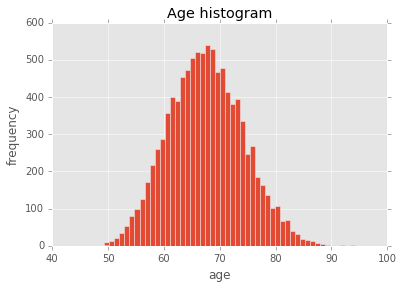

In [18]:
plt.hist(data[:, ageidx], bins=50)
plt.xlabel('age')
plt.ylabel('frequency')
plt.title('Age histogram')

[False False False False False]
[ True  True  True  True  True]


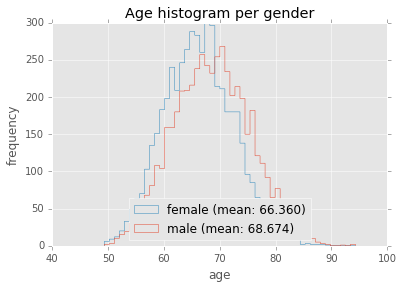

In [19]:
# create a mask to identify males and females in the data
male = data[:, colidx['gender']] > 0
female = np.invert(male)
print(female[:5])
print(male[:5])

# create vectors of ages
male_ages = data[male, ageidx]
female_ages = data[female, ageidx]

# plot histograms of age vectors
plt.hist((male_ages, female_ages), bins=50, histtype='step')
plt.xlabel('age')
plt.ylabel('frequency')
plt.legend(['female (mean: %1.3f)' % np.mean(female_ages),
            'male (mean: %1.3f)' % np.mean(male_ages)],
          loc='lower center')
plt.title('Age histogram per gender')

# 2. Simple predictive modelling

# 3. Feature selection

We will work with some feature selection methods in order to remove attributes that may not be necessary for the predictive models. Let's have a look again at the data rapidly. This time we use a pandas DataFrame and then printing the first rows as well as a description for each feature.

In [20]:
# Create the data frame
df = pd.DataFrame(data,columns=features)
# Print the first rows
print df.head()
# Print a description of the variables
print df.describe()

#df['gender'].astype(int).unique()

# A simple technique for feature selection is to remove the attributes with low or zero variance.
# For this purpose we will Scikit-learn
from sklearn.feature_selection import VarianceThreshold
# here we can specify a threshold, default is zero variance
var_selector = VarianceThreshold(0.0)
new_data = var_selector.fit_transform(data)
print "Reduced dataset contains {0:d} features".format(new_data.shape[1])

         age  gender  A01AA01  A01AA30   A01AB03  A01AB09  A01AB12  A01AC01  \
0  73.441594     1.0      0.0      0.0  4.567449      0.0      0.0      0.0   
1  65.964129     1.0      0.0      0.0  0.000000      0.0      0.0      0.0   
2  73.871248     1.0      0.0      0.0  0.000000      0.0      0.0      0.0   
3  69.656015     1.0      0.0      0.0  0.000000      0.0      0.0      0.0   
4  67.309671     1.0      0.0      0.0  0.000000      0.0      0.0      0.0   

   A02AD01  A02AD02   ...     V08AA01  V08AA05  V08AB02  V08AB03  V08AB05  \
0      0.0      0.0   ...         0.0      0.0      0.0      0.0      0.0   
1      0.0      0.0   ...         0.0      0.0      0.0      0.0      0.0   
2      0.0      0.0   ...         0.0      0.0      0.0      0.0      0.0   
3      0.0      0.0   ...         0.0      0.0      0.0      0.0      0.0   
4      0.0      0.0   ...         0.0      0.0      0.0      0.0      0.0   

   V08AB07  V08AB09  V08AB11  V08AD01  V08BA01  
0      0.0   

So, the dataset contains a lot of features with zero variance. Removing these features can speed up the learning process.

Now, let's try a simple method which orders the features according to their importances calculated for a certain scoring function. For example, that could be a statistical test (e.g. $\chi^2$) or even another machine learning model (e.g. a linear model with $L_1$ regularization). 

(50, 950)

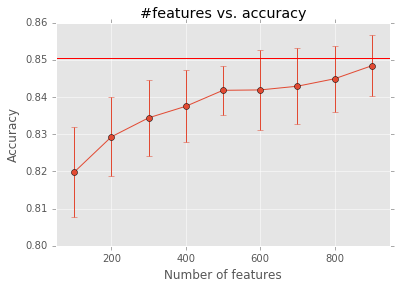

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,chi2,SelectFromModel

# helper function for cross-validating a classifier
# we use a fixed seed in order to compare classifiers
# across the same folds
def crossValidateClassifier(X,y,clf):
    cross_val = cross_validation.KFold(len(y),n_folds=5,shuffle=True,random_state=224441)
    cv_score = cross_validation.cross_val_score(clf,X,y,scoring='accuracy',cv=cross_val)
    return np.mean(cv_score),np.std(cv_score)

# We use a non-linear model namely Random Forest which 
# builds multiple decision trees
# ==== Marc, I suposse here we will use parameters we optimize in previously ====
model = RandomForestClassifier(n_estimators=100,max_depth=35,n_jobs=3)
    
k_values = np.arange(100,1000,100)
mean = []
stds = []
for k in k_values:
    X_new = SelectKBest(chi2, k=k).fit_transform(data, labels)
    m,std = crossValidateClassifier(X_new,labels,model)
    mean.append(m)
    stds.append(std)

m,std = crossValidateClassifier(data,labels,model)

plt.errorbar(k_values,mean,yerr=stds, fmt='-o')
plt.axhline(y=m,color='red')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.title('#features vs. accuracy')
plt.xlim(50,950)

(10000, 615)
(10000, 743)
(10000, 829)
(10000, 844)
(10000, 855)
(10000, 857)


(550, 950)

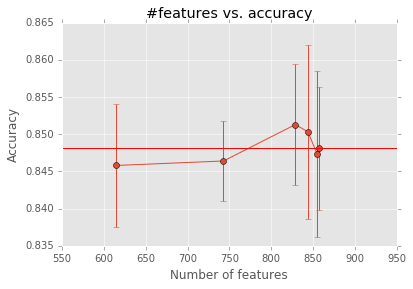

In [50]:
from sklearn.feature_selection import SelectFromModel

c_values = [0.01,0.1,1,10,100,1000]

mean = []
stds = []
shapes = []
for c in c_values:
    selector = SelectFromModel(LinearSVC(C=c, penalty="l1", dual=False),prefit=False)
    X_new = selector.fit_transform(data,labels)
    print X_new.shape
    m,std = crossValidateClassifier(X_new,labels,model)
    shapes.append(X_new.shape[1])
    mean.append(m)
    stds.append(std)

plt.errorbar(shapes,mean,yerr=stds, fmt='-o')
plt.axhline(y=m,color='red')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.title('#features vs. accuracy')
plt.xlim(550,900)

# 5. Constructing a machine learning pipeline